In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import csv

: 

In [ ]:
data_tr = pd.read_csv('../data/train.csv')
data_te = pd.read_csv('../data/test.csv')

In [ ]:
data_tr.head()
print(data_tr.shape)
data_tr.info()

(225000, 325)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225000 entries, 0 to 224999
Columns: 325 entries, _STATE to TARGET
dtypes: bool(1), float64(318), int64(6)
memory usage: 556.4 MB


In [ ]:
all_columns = data_tr.columns.values
# print(all_columns)
column_of_interest = ['SEXVAR', 'GENHLTH', 'PHYSHLTH', 'MENTHLTH', 'POORHLTH', 'PRIMINSR', 'PERSDOC3', 'MEDCOST1', 'CHECKUP1', 'EXERANY2', 'SLEPTIM1', 'LASTDEN4', 'CVDSTRK3', 'ASTHMA3', 'ASTHNOW', 'CHCSCNC1', 'CHCOCNC1', 'CHCCOPD3', 'ADDEPEV3', 'CHCKDNY2', 'HAVARTH4', 'DIABETE4', 'WEIGHT2', 'HEIGHT3', 'DECIDE', 'DIFFWALK', 'DIFFDRES', 'DIFFALON', 'SMOKE100', 'SMOKDAY2', 'USENOW3', 'ECIGNOW2', 'LCSFIRST', 'LCSLAST', 'LCSNUMCG', 'ALCDAY4', 'AVEDRNK3', 'DRNK3GE5', 'MAXDRNKS', 'FLUSHOT7', 'HIVRISK5', 'COVIDPOS', 'COVIDSMP', 'COVIDPRM', 'PDIABTS1', 'PREDIAB2', 'DIABTYPE', 'INSULIN1', 'CHKHEMO3', 'EYEEXAM1', 'FEETSORE', 'TOLDCFS', 'HAVECFS', 'WORKCFS', 'COVIDVA1', 'SHINGLE2', 'COPDCOGH', 'COPDFLEM', 'COPDBRTH', 'COPDBTST', 'COPDSMOK', 'CNCRDIFF', 'CNCRAGE', 'CNCRTYP2', 'CSRVDOC1', 'CIMEMLOS', 'CDHOUSE', 'CDASSIST', 'CDHELP', 'CDSOCIAL', 'ACEDEPRS', 'ACEDRINK', 'ACEDRUGS', 'ACEPRISN', 'ACEPUNCH', 'LSATISFY', 'EMTSUPRT', 'SDHISOLT', 'SDHEMPLY', 'FOODSTMP', 'SDHFOOD1', 'SDHSTRE1', 'MARIJAN1', 'MARJSMOK']

columns_to_delete = ['_STATE', 'FMONTH', 'IDATE', 'IMONTH', 'IDAY', 'IYEAR', 'SEQNO', 'Num', 'PVTRESD1', 'COLGHOUS', 'STATERE1', 'CELPHON1', 'NUMADULT', 'RESPSLCT', 'SAFETIME', 'CELLFON5', 'PVTRESD3', 'CCLGHOUS', 'CSTATE1', 'LANDLINE', 'CHILDREN']

target_columns = ['TARGET']

k = 0
for c in column_of_interest :
    if c not in all_columns :
        print(f"column '{c}' is not in dataframe")
    else :
        k+=1
        #print("good")
        pass
print(k)


for c in columns_to_delete :
    if c not in all_columns :
        print(f"column '{c}' is not in dataframe")
    else :
        #print("good")
        pass

X_tr = data_tr[column_of_interest]
y_tr = data_tr['TARGET']


84
column 'Num' is not in dataframe


# Feature engineering

In [ ]:
"""
Heatmap visualization using Plotly.
Colors will be:
    from -inf to central_limit_val : black
    from central_limit_val to +inf : blue to pink shades
Args:
    matrix: 2D array containing the data values
    xlabels: Labels for x-axis (columns)
    ylabels: Labels for y-axis (rows)
    central_limit_val: Define color thresold. If None, auto-calculated
    plot: Whether to display the plot
    full_plotly_offline: Whether to include full Plotly JS in HTML output
Returns:
    HTML string of the plot
"""

def plot_nan_proportion_heatmap(matrix, xlabels, ylabels, width=800, height=500, plot=True, full_plotly_offline=False):
    # Convert to DataFrame
    df = pd.DataFrame(matrix, columns=xlabels, index=ylabels)

    # Create a NaN indicator matrix: 1 for NaN, 0 for non-NaN
    nan_indicator = df.isna().astype(int)

    # Plot the NaN indicator matrix
    fig = px.imshow(
        nan_indicator,
        width=width,
        height=height,
        template="plotly_white",
        color_continuous_scale="Greys",  # Use a grayscale gradient
        labels={"color": "NaN Proportion"},
        aspect="auto",
        zmin=0,
        zmax=1,
    )
    fig.update_xaxes(side="top", tickangle=45, tickfont=dict(size=5))
    fig.update_layout(
        margin=dict(pad=1),
        # title="Proportion of NaN Values (1 = NaN, 0 = Non-NaN)",

    )

    # Return or show
    if plot:
        fig.show()
    if full_plotly_offline:
        return fig.to_html(full_html=True)
    else:
        return fig.to_html(full_html=False, include_plotlyjs=False)


plot_nan_proportion_heatmap(X_tr.head(100), xlabels=column_of_interest, ylabels=range(100))



'<div>                            <div id="c8f3661e-6054-4ad2-a158-63bcdc0f9551" class="plotly-graph-div" style="height:500px; width:800px;"></div>            <script type="text/javascript">                window.PLOTLYENV=window.PLOTLYENV || {};                                if (document.getElementById("c8f3661e-6054-4ad2-a158-63bcdc0f9551")) {                    Plotly.newPlot(                        "c8f3661e-6054-4ad2-a158-63bcdc0f9551",                        [{"coloraxis":"coloraxis","name":"0","x":["SEXVAR","GENHLTH","PHYSHLTH","MENTHLTH","POORHLTH","PRIMINSR","PERSDOC3","MEDCOST1","CHECKUP1","EXERANY2","SLEPTIM1","LASTDEN4","CVDSTRK3","ASTHMA3","ASTHNOW","CHCSCNC1","CHCOCNC1","CHCCOPD3","ADDEPEV3","CHCKDNY2","HAVARTH4","DIABETE4","WEIGHT2","HEIGHT3","DECIDE","DIFFWALK","DIFFDRES","DIFFALON","SMOKE100","SMOKDAY2","USENOW3","ECIGNOW2","LCSFIRST","LCSLAST","LCSNUMCG","ALCDAY4","AVEDRNK3","DRNK3GE5","MAXDRNKS","FLUSHOT7","HIVRISK5","COVIDPOS","COVIDSMP","COVIDPRM","PDIABTS1","PRED

SEXVAR      0.000000
GENHLTH     0.000004
PHYSHLTH    0.000018
MENTHLTH    0.000009
POORHLTH    0.428258
              ...   
FOODSTMP    0.459009
SDHFOOD1    0.459884
SDHSTRE1    0.463507
MARIJAN1    0.779591
MARJSMOK    0.972227
Length: 84, dtype: float64


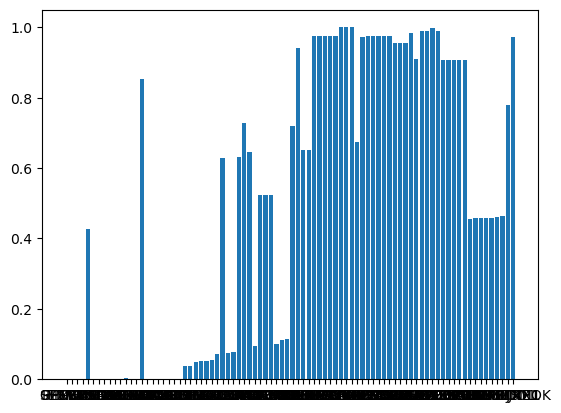

In [ ]:
nans_prop = X_tr.isna().mean()

plt.bar(column_of_interest, height=nans_prop)
print(nans_prop)


In [ ]:
nan_threshold = 0.4

print(f"We remove columns containing more than {nan_threshold*100} % of NaNs")
rem_cols = X_tr.columns[nans_prop > nan_threshold]
print(rem_cols)
print(f"Number of columns to remove {len(rem_cols)}")

X_tr = X_tr.drop(columns=rem_cols)
X_tr.head()

We remove columns containing more than 40.0 % of NaNs
Index(['POORHLTH', 'ASTHNOW', 'SMOKDAY2', 'LCSFIRST', 'LCSLAST', 'LCSNUMCG',
       'AVEDRNK3', 'DRNK3GE5', 'MAXDRNKS', 'COVIDSMP', 'COVIDPRM', 'PDIABTS1',
       'PREDIAB2', 'DIABTYPE', 'INSULIN1', 'CHKHEMO3', 'EYEEXAM1', 'FEETSORE',
       'TOLDCFS', 'HAVECFS', 'WORKCFS', 'COVIDVA1', 'SHINGLE2', 'COPDCOGH',
       'COPDFLEM', 'COPDBRTH', 'COPDBTST', 'COPDSMOK', 'CNCRDIFF', 'CNCRAGE',
       'CNCRTYP2', 'CSRVDOC1', 'CIMEMLOS', 'CDHOUSE', 'CDASSIST', 'CDHELP',
       'CDSOCIAL', 'ACEDEPRS', 'ACEDRINK', 'ACEDRUGS', 'ACEPRISN', 'ACEPUNCH',
       'LSATISFY', 'EMTSUPRT', 'SDHISOLT', 'SDHEMPLY', 'FOODSTMP', 'SDHFOOD1',
       'SDHSTRE1', 'MARIJAN1', 'MARJSMOK'],
      dtype='object')
Number of columns to remove 51


,SEXVAR,GENHLTH,PHYSHLTH,MENTHLTH,PRIMINSR,PERSDOC3,MEDCOST1,CHECKUP1,EXERANY2,SLEPTIM1,...,DIFFWALK,DIFFDRES,DIFFALON,SMOKE100,USENOW3,ECIGNOW2,ALCDAY4,FLUSHOT7,HIVRISK5,COVIDPOS
0,2.0,3.0,30.0,88.0,3.0,1.0,2.0,1.0,1.0,7.0,...,2.0,2.0,2.0,1.0,3.0,1.0,208.0,1.0,2.0,1.0
1,2.0,3.0,88.0,15.0,10.0,2.0,2.0,3.0,2.0,6.0,...,2.0,2.0,2.0,2.0,3.0,1.0,NaN,NaN,NaN,NaN
2,1.0,2.0,88.0,88.0,1.0,1.0,2.0,1.0,1.0,8.0,...,2.0,2.0,2.0,1.0,3.0,1.0,888.0,2.0,2.0,1.0
3,1.0,3.0,88.0,88.0,1.0,3.0,2.0,1.0,1.0,10.0,...,2.0,2.0,2.0,2.0,3.0,1.0,888.0,1.0,2.0,2.0
4,1.0,3.0,88.0,3.0,9.0,2.0,2.0,1.0,1.0,77.0,...,2.0,2.0,2.0,2.0,3.0,4.0,205.0,1.0,2.0,2.0


Instead of removing all lines with NaNs, which will result on not enough data, we will replace NaNs values that are representative of the columns

In first instance, for categories with NaNs, we will replace those NaNs with the catagoriy that is the most present

In [ ]:

def replace_nan_mode(df):
    """
    Replaces NaN values in each column of a DataFrame with the most frequent value (mode) of that column.
    Parameters:
    df (pd.DataFrame): Input DataFrame
    Returns:
    pd.DataFrame: DataFrame with NaN values replaced by the mode of each column
    """
    for column in df.columns:
        print(column)
        mode = df[column].mode()
        print(mode)
        if not mode.empty:  # Only proceed if mode is not empty
            df[column] = df[column].fillna(mode[0])  # Assign the result back to the column
    return df


X_tr_mode = replace_nan_mode(X_tr_mode)

X_tr_mode.head(10)

# plot_nan_proportion_heatmap(X_tr_mode.head(), xlabels=X_tr_mode.columns, ylabels=range(10))

Are there any NaN values in the DataFrame? SEXVAR      False
GENHLTH      True
PHYSHLTH     True
MENTHLTH     True
PRIMINSR     True
PERSDOC3     True
MEDCOST1     True
CHECKUP1     True
EXERANY2     True
SLEPTIM1     True
LASTDEN4     True
CVDSTRK3     True
ASTHMA3      True
CHCSCNC1     True
CHCOCNC1     True
CHCCOPD3     True
ADDEPEV3     True
CHCKDNY2     True
HAVARTH4     True
DIABETE4     True
WEIGHT2      True
HEIGHT3      True
DECIDE       True
DIFFWALK     True
DIFFDRES     True
DIFFALON     True
SMOKE100     True
USENOW3      True
ECIGNOW2     True
ALCDAY4      True
FLUSHOT7     True
HIVRISK5     True
COVIDPOS     True
dtype: bool
SEXVAR
0    2.0
Name: SEXVAR, dtype: float64
GENHLTH
0    2.0
Name: GENHLTH, dtype: float64
PHYSHLTH
0    88.0
Name: PHYSHLTH, dtype: float64
MENTHLTH
0    88.0
Name: MENTHLTH, dtype: float64
PRIMINSR
0    1.0
Name: PRIMINSR, dtype: float64
PERSDOC3
0    1.0
Name: PERSDOC3, dtype: float64
MEDCOST1
0    2.0
Name: MEDCOST1, dtype: float64
CHECKUP1
0  

,SEXVAR,GENHLTH,PHYSHLTH,MENTHLTH,PRIMINSR,PERSDOC3,MEDCOST1,CHECKUP1,EXERANY2,SLEPTIM1,...,DIFFWALK,DIFFDRES,DIFFALON,SMOKE100,USENOW3,ECIGNOW2,ALCDAY4,FLUSHOT7,HIVRISK5,COVIDPOS
0,2.0,3.0,30.0,88.0,3.0,1.0,2.0,1.0,1.0,7.0,...,2.0,2.0,2.0,1.0,3.0,1.0,208.0,1.0,2.0,1.0
1,2.0,3.0,88.0,15.0,10.0,2.0,2.0,3.0,2.0,6.0,...,2.0,2.0,2.0,2.0,3.0,1.0,888.0,1.0,2.0,2.0
2,1.0,2.0,88.0,88.0,1.0,1.0,2.0,1.0,1.0,8.0,...,2.0,2.0,2.0,1.0,3.0,1.0,888.0,2.0,2.0,1.0
3,1.0,3.0,88.0,88.0,1.0,3.0,2.0,1.0,1.0,10.0,...,2.0,2.0,2.0,2.0,3.0,1.0,888.0,1.0,2.0,2.0
4,1.0,3.0,88.0,3.0,9.0,2.0,2.0,1.0,1.0,77.0,...,2.0,2.0,2.0,2.0,3.0,4.0,205.0,1.0,2.0,2.0
5,1.0,3.0,88.0,88.0,3.0,1.0,2.0,2.0,1.0,7.0,...,2.0,2.0,2.0,2.0,3.0,1.0,201.0,1.0,9.0,2.0
6,2.0,3.0,88.0,88.0,2.0,1.0,2.0,1.0,1.0,6.0,...,2.0,2.0,2.0,2.0,3.0,1.0,888.0,1.0,2.0,3.0
7,1.0,3.0,88.0,88.0,1.0,1.0,2.0,1.0,1.0,7.0,...,2.0,2.0,2.0,1.0,3.0,4.0,102.0,2.0,2.0,2.0
8,2.0,3.0,5.0,3.0,1.0,1.0,2.0,1.0,1.0,7.0,...,2.0,2.0,2.0,2.0,3.0,1.0,202.0,2.0,1.0,1.0
9,1.0,2.0,2.0,3.0,10.0,2.0,2.0,1.0,1.0,8.0,...,1.0,2.0,2.0,1.0,3.0,1.0,102.0,1.0,2.0,2.0


# Prediction tah jai la vision

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)

print(X_tr_mode.shape)
print(y_tr.shape)
model.fit(X_tr_mode, y_tr)

# y_pred = model.predict(df_fteng_mode)

(225000, 33)
(225000,)


/home/hugoat/anaconda3/envs/SDDenv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning:

lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=101, criterion='log_loss', max_depth=6)
rf.fit(X_tr_mode, y_tr)



In [ ]:
from sklearn.metrics import f1_score
import sys
import os

sys.path.append(os.path.abspath("../soumission"))

def soumission_csv(model,df_data,indexes,filename="../data/prediction.csv"):
    """
    Génère un fichier csv de predictions reponse à soumettre à partir d'un model entrainé et d'un data_frame.
        
    Paramètres :
    - model, model entrainé 
    - df_data : data frame des données à predire, dois contenir la colone "ID" et les meme features que le model entrainé
    - filename : nom du fichier créé par la fonction
        
    Retour :
    - X_train_pca, X_test_pca : listes de matrices transformées
    - pca_list : liste des objets PCA par état
    - top_features_dict : dict avec top features par état
    """
    features = df_data.drop(columns=["ID"], errors='ignore')

    prediction = model.predict(features)

    with open(filename, mode="w", newline="") as file:
        writer = csv.writer(file)
        writer.writerow(["ID", "TARGET"])  # En-têtes
        for index,id in enumerate(indexes) :
            writer.writerow([id, prediction[index]])
    print(f"Fichier '{filename}' créé avec succès !")
    return

remain_col = X_tr.columns
remain_col.shape

X_te = data_te[remain_col]
X_te.head()
y_pred = rf.predict(X_te)
y_pred

# soumission_csv(rf, y_pred, X_te["ID"],"../data/prediction_colon_of_interest.csv")

NameError: name 'X_tr' is not defined